In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [38]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [39]:
import datetime as dt

In [40]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [41]:
df=data.loc['0':'365']

In [42]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['Ozone']

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=6)

In [44]:
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=5,
                                      min_samples_leaf=4,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features='auto',
                          min_samples_leaf=4, min_samples_split=5,
                          n_estimators=1000)

In [45]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9878791174364173

Score on test data: 0.759631840759676

Root Mean Squared Error: 11.337792751989006

Overall model accuracy: 0.759631840759676


In [46]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [47]:
predict=grad_boost.predict(X)

In [48]:
predict

array([19.27081169, 18.50311745, 19.31440869, 10.73739409, 21.92416437,
       18.49842496, 23.07526605, 49.46427465, 53.70939199, 53.36469803,
       50.27095638, 56.05965881, 56.92986447, 51.78745657, 51.86775986,
       55.55739589, 58.69642519, 52.634758  , 56.43503548, 57.46977844,
       59.78824093, 61.57023863, 56.43943519, 52.38921919, 50.22165722,
       29.04110288, 29.30817452, 24.32722458, 23.22079138, 25.68782502,
       31.94342617, 28.58873919, 27.00552519, 21.36253869, 30.0600071 ,
       32.6820663 , 30.06657269, 28.3192644 , 24.98515599, 29.51211588,
       27.09200593, 24.3694282 , 31.78279203, 30.92543616, 33.66301805,
       26.90274152, 23.58462152, 27.92718639, 29.01222506, 23.90236281,
       24.15230668, 11.98247663])

In [49]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [50]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [51]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [52]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

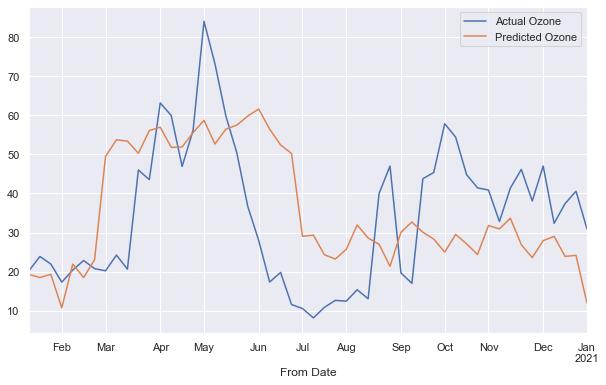

In [53]:
test['Ozone'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted Ozone')

In [54]:
np.sqrt(mean_squared_error(test['Ozone'],X['pred']))

18.45718164935347

In [55]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 8.737784363073803
MSE: 128.54554448705446
RMSE: 11.337792751989006
R-Squared: 0.759631840759676


In [56]:
mae = metrics.mean_absolute_error(test['Ozone'],X['pred'])
mse = metrics.mean_squared_error(test['Ozone'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['Ozone'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 15.299467345942247
MSE: 340.6675544372305
RMSE: 18.45718164935347
R-Squared: -0.10100301682222845


In [57]:
import pickle
filename = 'Ozone_gboostmodel.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [58]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.759631840759676


# 3rd plot

In [59]:
testcase = pd.DataFrame()

In [60]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [61]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [62]:
testcase

,test,pred,Corrected
365,28.570000,20.920511,32.258304
116,86.474286,84.760978,96.098771
61,70.641429,64.748045,76.085838
325,52.700000,59.599636,48.261843
100,80.438571,60.070066,71.407859
...,...,...,...
249,45.662857,37.695569,49.033361
351,31.645714,31.523263,42.861056
27,29.760000,29.961017,18.623224
19,79.041429,71.875726,83.213519


In [63]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [64]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8863025894019123

In [65]:
test2020=pd.DataFrame()

In [66]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [67]:
test2020.index=test.index

In [68]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

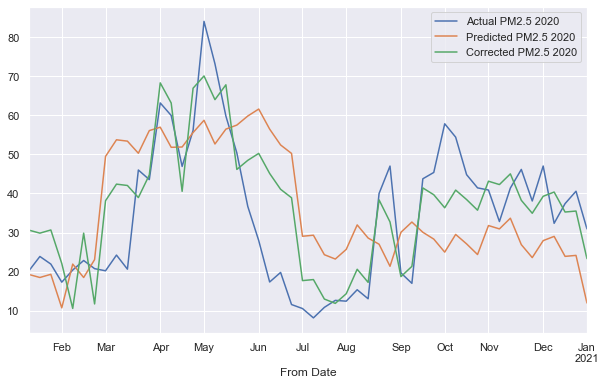

In [69]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [70]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.4597044782918307

In [71]:
test2020.loc["2020-05-18":"2020-05-31",'pred'].median()

58.62900968607784

In [73]:
test2020.loc["2020-01-30":"2020-03-22",'pred'].median()

36.2697703484196